In [12]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Flux balace

In the previous lectures we looked at time dependent process. In this lecture we explore the use of space in the model.
We start by assuming that we have some flux, that is a vector field $\vec J(x,y) = [j_x(x,y), j_y(x,y)]$ in space an we assume for now that the field is time independent. The field $\vec J$ represents flux, that is the volue of fluid the passes through some surface over a time unit.

Assume for now a smooth convex area (in 2D) or a volume (in 3D) then the change of mass that comes in/out of the surface and into the area/volume is
$$ {\frac {\partial m}{\partial t}} = -\int_{S} {\vec J} \cdot {\vec n}\ dS $$
The minus sign is a result of defining the normal as going {\bf out} of the surface. This implies a negative change in mass when the right hand side is positive.

Since the volume is arbitrary we can normalize it by dividing in the volume obtainng
$$ {\frac 1V} {\frac {\partial m}{\partial t}} = -{\frac 1V} \int_{S} {\vec J} \cdot {\vec n}\ dS $$

Noting that mass divided by volume is the average density, $\rho_{av}$ over the volume, we have
$$ {\frac {\partial \rho_{av}}{\partial t}} = -{\frac 1V} \int_{S} {\vec J} \cdot {\vec n}\ dS $$

The average density become a point density if we take the volume to $0$, obtaining
$$ {\frac {\partial \rho}{\partial t}} = -{\lim}_{V\rightarrow 0}\ {\frac 1V} \int_{S} {\vec J} \cdot {\vec n}\ dS $$





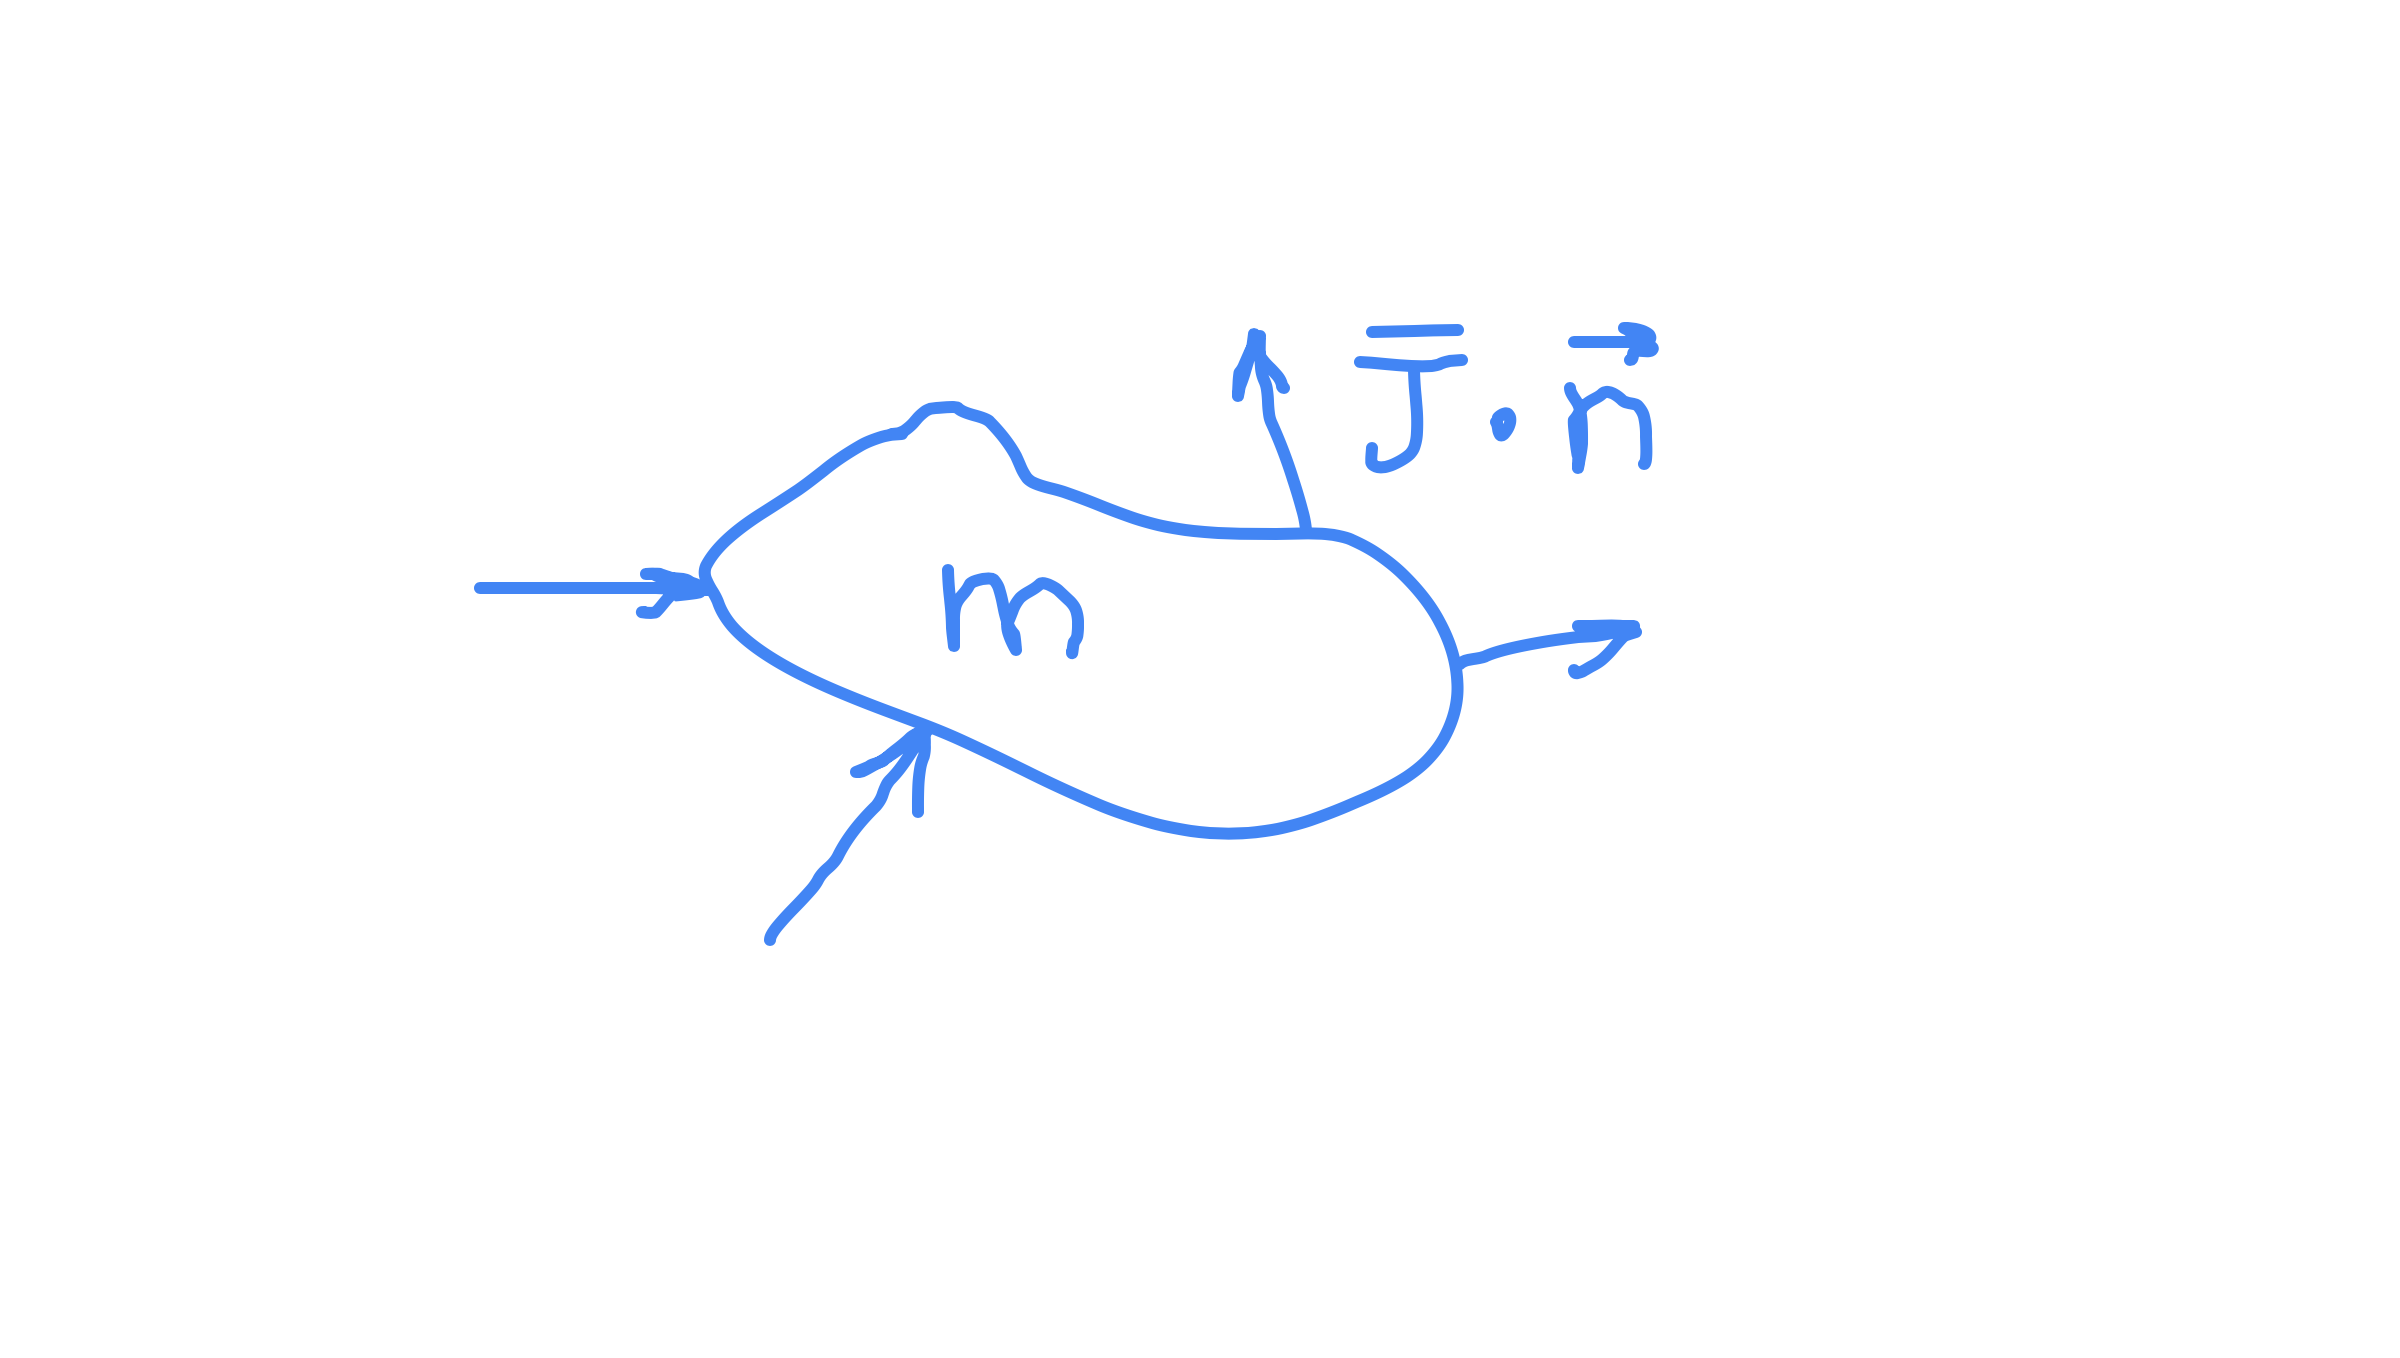

In [11]:
from IPython.display import Image
Image(filename='volume.png')

This idea of looking at flux in and out of an infitesimal volume is basic when looking at fluxes. To this end, we define an operator, the divergence as
$$ \nabla \cdot {\vec J} = {\lim}_{V\rightarrow 0}\ {\frac 1V} \int_{S} {\vec J} \cdot {\vec n}\ dS $$

The divergence operates on a vector field and returns back a scalar. The vector field indicates how much flux came into and out of a small volume and the
number that comes back represents the change in density in this small volume.



The definition of the divergence is coordinate independent. However, it is useful to develop a formula given some coordinate system, in particular
our usual cartesian system.

To this end, we divide the space into small rectangular cells and explore the flux that comes into and out of the cell.
A picure of such a cell in 2 and 3D is plotted below       

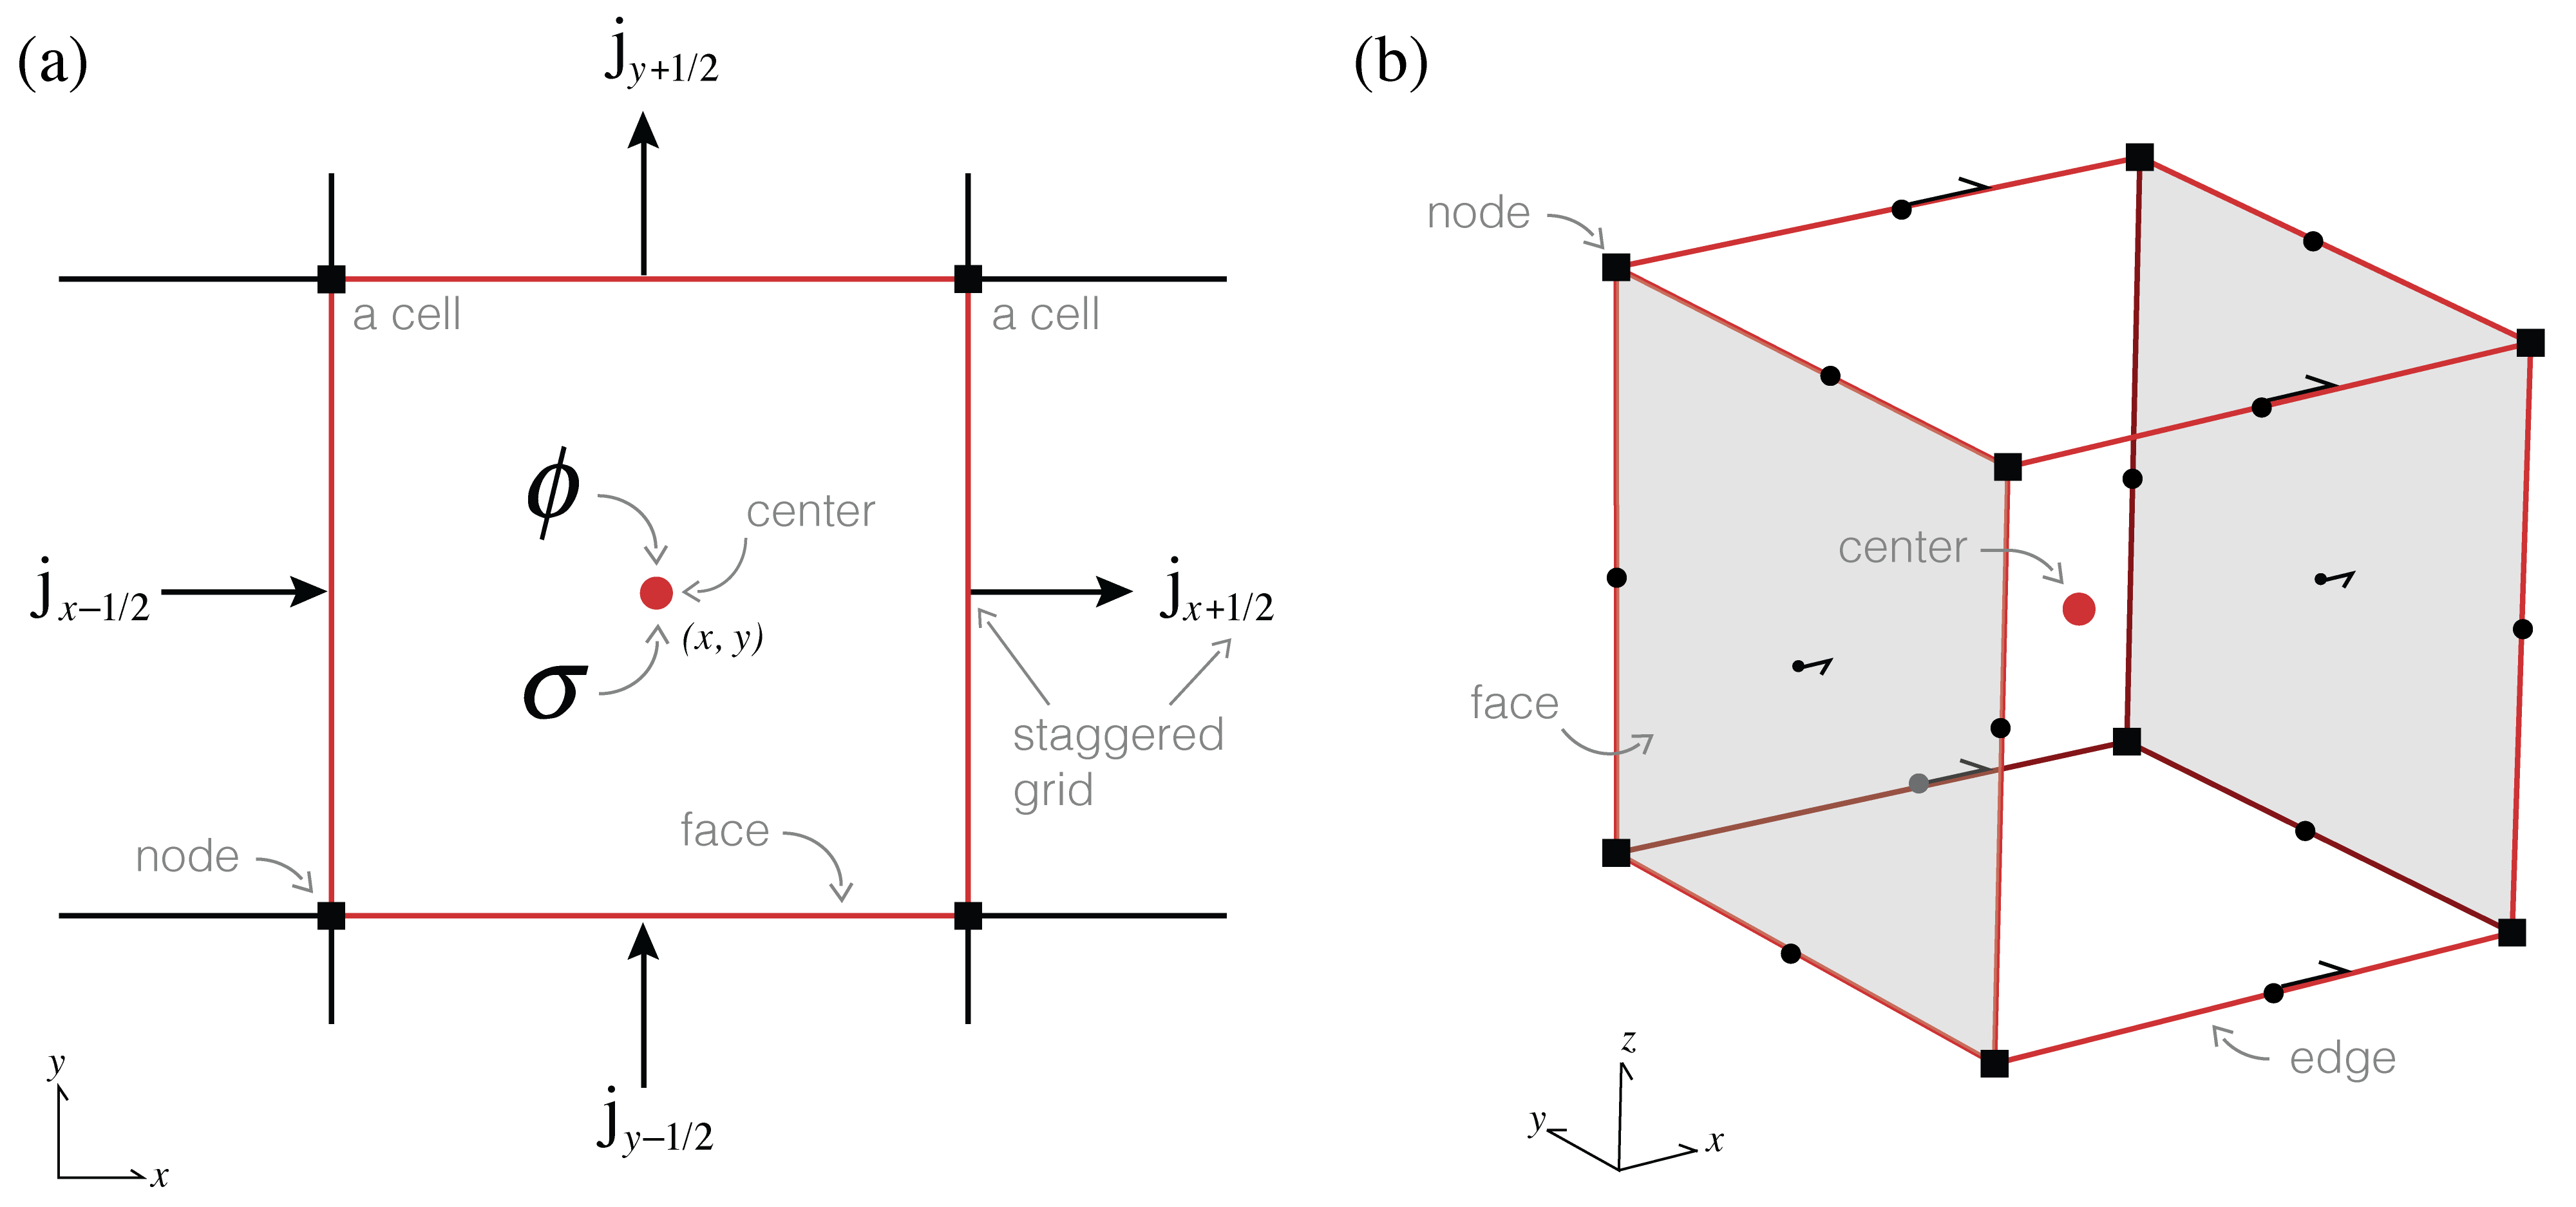

In [10]:
from IPython.display import Image
Image(filename='finite-volume.png')

Let us examine the volumes that come into and outof the 2D cell. We leave the 3D cell as a homework assignment.

Since the volume is small, we assume that the flux is constant over each face/edge and we use a single number to describe it and put that number
in the center of the face/edge.
The flux that comes into and out of the box in the x direction is, the difference in fluxes times the length of the edge, that is
$$ \delta j_x = (j_x^+ - j_x^-) \delta y $$
Similarly, the flux that come into and out of the box in the y direction is
$$ \delta j_y = (j_y^+ - j_y^-) \delta x $$

Therefore, the total mass that comes in/out of the box it
$$ -{\frac {\delta m}{\delta t}} = (j_x^+ - j_x^-) \delta y + (j_y^+ - j_y^-) \delta x $$
If we further normalize the mass by the volume we get
$$ -{\frac {1}{\delta x\delta y}} {\frac {\delta m}{\delta t}} = {\frac {j_x^+ - j_x^-}{ \delta x}} + {\frac{j_y^+ - j_y^-}{\delta y}} $$

If we now let the volume, that is, cell size shrink to $0$,and the time interval to be very small the difference becomes derivative and we obtain
$$ {\frac {\partial  \rho}{\partial t}} = -\left({\frac {\partial j_x}{ \partial x}} + {\frac{\partial j_y}{\partial y}} \right)$$

The relationship above defines the divergence operator is cartesian coordinates
$$ \nabla \cdot \vec J = \begin{pmatrix}{\frac \partial {\partial x}} & {\frac \partial {\partial y}}\end{pmatrix} \begin{pmatrix} j_x \\ j_y \end{pmatrix}  =  {\frac {\partial j_x} {\partial x}} + {\frac {\partial j_y} {\partial y}} $$

And the continuety equation is written as
$${\frac {\partial  \rho}{\partial t}} = -\nabla \cdot \vec J. $$


# Exercises

1. What is the divergence of the field $\vec J = [x^2y, -y^2x]$? Is this field mass preserving (that is $\nabla \cdot J = 0$)?

2. How should you pick the $y$ component of the vector ${\vec J} = [\sin(x), j_y]$ in order to make it mass preserving?

3. Choose $a\not=0$ and $b\not=0$ such that the vector field ${\vec J} = [ay, bx]$ is mass preserving. 

# From the continuety equation to the diffusion Equation

So far we do not have explored any relation between the flux and the density. The continuety equation does not have this realtion in it. This is where
observation is used to model the relation.

First, it is clear that a typical behavior of material is that it flows from areas where the density is high to places that the density is low.
That is, the absolute density typically does not play a role, however, the relative density does.
To this end we define the directional derivative in the direction ${\vec n}$ as
$$ {\frac {\partial \rho}{\partial \vec n}} = \lim_{h\rightarrow 0} {\frac {\rho({\vec x} + h{\vec n}) - \rho({\vec x})}{h}} $$ 
Here $\vec x = [x,y]$ and $\vec n = [n_x,n_y]$ with $\sqrt{n_x^2 + n_y^2} = 1$. 

This definition holds in any coordinate system. Choosing the usual cartesian coordinate system we define the gradient
$$ \nabla \rho = \begin{pmatrix} {\frac {\partial \rho}{\partial x}} \\ {\frac {\partial \rho}{\partial y}} \end{pmatrix}. $$
The gradient operator is an operator that takes a scalar field and returns a vector field.
For example, if the density is given by $\rho = xy$ then, the gradient of $\rho$ is
$$ \nabla \rho = [y,x]$$
Furthermore, a field $\vec J$ that can be written as a gradient of another function is called a potential field.
Not every field is a potential field. For example, the field $\vec V = [-y,x]$ is not a potential field.
The scalar function $\rho$ such that $\vec V = \nabla \rho$ is caled potential function.



If the flow is going from the direction of high density to the direction of low density then we get that
$$ {\vec J} = -\sigma \nabla \rho. $$
where $\sigma$ is a coefficient that depends on the media. Large $\sigma$ means that the flux is very sensitive to changes in pressure
while low $\sigma$ implies that the flux is not sensitive to changes in pressure.
The equation is often called Constitutive Equation. It appears in electromagnetic as Ohm's law, in Hydrology as Darcy's law, in feat conduction as Fourier's  law and in diffusion as Fick's law. It is rather fundamental to many different branches in science.

Substituting the flux into the continuety equation we obtain
$$ {\frac {\partial \rho}{\partial t}} = \nabla \cdot \sigma \nabla \rho $$

This is the heat equation which we will discuss in the next week and learn how to discretize and solve.




# Exercises

1. Is the field [x,y] a potential field? If so what is the potential function?

2. Prove that the field $[-y,x]$ is not a potential field.


# Discretization of the heat equation

We now discuss simple discretizations of the heat equation. We have to discretize both in space and time. To make the discretization simple in space we assume that $\sigma$ is constant in space. This leads to a simple form of the equation
$$ {\frac {\partial \rho}{\partial t}} = \sigma \nabla \cdot \nabla \rho = \sigma \nabla^2 \rho $$
where 
$$ \nabla^2 = {\frac {\partial^2}{\partial x^2}} + {\frac {\partial^2}{\partial y^2}}. $$ 

We assume to have a rectangular domain on $n \times m$ in 2D or $n \times m \times k$ in 3D pixels/voxels.
Every voxel is associated with a value $\rho_{i,j,k} = \rho(x_i,y_j,z_k)$.
A scond order derivative in the $x$ direction can be written as
$$ {\frac {\partial^2 \rho}{\partial x^2}} \approx {\frac {\rho_{i+1,j,k} - 2\rho_{i,j,k} + \rho_{i-1,j,k}}{h_x^2}} $$
where $h_x$ is the spacing in the x direction.
This can be coded up in the following way in 2D.

In [15]:
def d2dx2(rho,h):
    d2rhodx2 = (rho[:-2,:] - 2*rho[1:-1,:] + rho[2:,:])/(h**2)
    return d2rhodx2

We test the code by applying it to a known function, say $\rho(x,y) = \sin(2\pi x)\cos(2\pi y)$ in the interval $[0,1] \times [0,1]$.

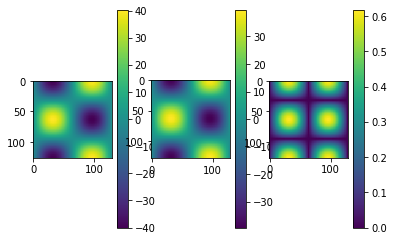

In [27]:
pi = 3.1415926353
nx, ny = (129, 128)
x = np.linspace(0, 1, nx); hx = x[1]-x[0]
y = np.linspace(0, 1, ny); hy = y[1]-y[0]
xv, yv = np.meshgrid(x, y)
rho = np.sin(2*pi*xv)*np.cos(2*pi*yv)

d2rhodx2     = d2dx2(rho,hx);
d2rhodx2True = -4*pi**2 * rho;


plt.subplot(1,3,1)
plt.imshow(d2rhodx2); plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(d2rhodx2True); plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(d2rhodx2True[1:-1,:]-d2rhodx2)); plt.colorbar()


# Boundary conditions

Note that the output of the code does not include boundary conditions. To treat the boundary we need to assume something about the function we differentiate. Two common assumptions are
1. The function is $0$ on the bounday, reffers as Drichlet BC
2. The function has zero derivative on the boundary, that is $\rho_x(0,y) = 0$, reffers as Nuemann BC.

Let us work with the second assumption, which is not trivial to apply.
Let us look at the finite difference stencile at the first entry. We have that
$$ \rho_{xx} \approx h^{-2}(\rho_{-1} - 2 \rho_0 + \rho_1) $$
where $\rho_{-1}$ is what is often called a ghost point. It is a point out of the domain and we can compute its value using
the boundary conditions.
The boundary condition $\rho_x(0,y)=0$ can be approximated by
$$ \rho_x(0,y) = (2h)^{-1}(\rho_{1} - \rho_{-1}) = 0. $$
This implies that $\rho_{1} = \rho_{-1}$ and the finite difference on the boundary can be written as
$$ \rho_{xx} \approx h^{-2}(\rho_{-1} - 2 \rho_0 + \rho_1) = h^{-2}(2\rho_{1} - 2 \rho_0 ) $$

We now modify the code to reflect this change

In [60]:
def d2dx2N(rho,h):
    n = rho.shape
    d2rhodx2 = torch.zeros(n)
    d2rhodx2[1:-1,:] = (rho[:-2,:] - 2*rho[1:-1,:] + rho[2:,:])/(h**2)
    d2rhodx2[0,:] = (2*rho[1,:] - 2*rho[0,:])/(h**2)
    d2rhodx2[-1,:] = (2*rho[-2,:] - 2*rho[-1,:])/(h**2)    
    return d2rhodx2

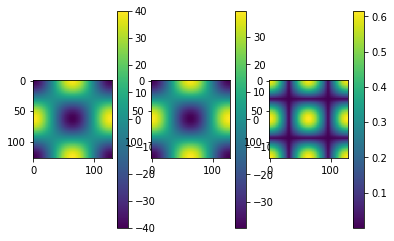

In [61]:
pi = 3.1415926353
nx, ny = (129, 128)
x = np.linspace(0, 1, nx); hx = x[1]-x[0]
y = np.linspace(0, 1, ny); hy = y[1]-y[0]
xv, yv = np.meshgrid(x, y)
rho = torch.tensor(np.cos(2*pi*xv)*np.cos(2*pi*yv))

d2rhodx2     = d2dx2N(rho,hx);
d2rhodx2True = -4*pi**2 * rho;


plt.subplot(1,3,1)
plt.imshow(d2rhodx2); plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(d2rhodx2True); plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(d2rhodx2True-d2rhodx2)); plt.colorbar()

# Homework (Due Thurs)

1. Write a code that differentiate the function $\rho$ twice in the y direction and test it

2. Combine the code above that computes the x derivative and y derivatives to compute the Laplacian of $\rho$, $\nabla^2 \rho$
and test the code

# Discretization of the Laplacian

We now combine derivatives in the x and y direction in order to get the Laplacian

In [62]:
def d2dy2N(rho,h):
    n = rho.shape
    d2rhody2 = torch.zeros(n)
    d2rhody2[:,1:-1] = (rho[:,:-2] - 2*rho[:,1:-1] + rho[:,2:])/(h**2)
    d2rhody2[:,0] = (2*rho[:,1] - 2*rho[:,0])/(h**2)
    d2rhody2[:,-1] = (2*rho[:,-2] - 2*rho[:,-1])/(h**2)    
    return d2rhody2

def Lap(rho,hx,hy):
    return d2dx2N(rho,hx) + d2dy2N(rho,hy)

# Testing the code

We now use the code on a known function to test it

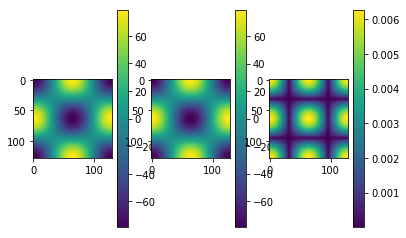

In [63]:
pi = 3.1415926353
nx, ny = (129, 128)
x = np.linspace(0, 1, nx); hx = x[1]-x[0]
y = np.linspace(0, 1, ny); hy = y[1]-y[0]
xv, yv = np.meshgrid(x, y)
rho = torch.tensor(np.cos(2*pi*xv)*np.cos(2*pi*yv))

Laprho     = Lap(rho,hx,hy)
LaprhoTrue =  -(8*pi**2)*rho


plt.subplot(1,3,1)
plt.imshow(Laprho); plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(LaprhoTrue); plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(LaprhoTrue-Laprho)); plt.colorbar()

# Discretizing the Heat Equation

The Laplacian is a simple linear operator that is applied on the density $\rho$.
Let $\rho_h$ be a discretization of the density on the grid descibed above and let  
$\nabla^2_h \rho_h$ be the discretization of the Laplacian of $\rho$.

We can now write an ordinary differential equation that repaces the heat equation. The equation has the form
$$ {\frac {d \rho_h}{dt}} = \nabla^2_h \rho_h. $$
Using a forward Euler step (with a sufficiently small step) we obtain a simple algorithm to obtain an approximation
for the heat equation
$$ \rho_h(t_{j+1}) = \rho_h(t_j) + \delta t \nabla^2_h \rho_h(t_j). $$

We can now implement the heat equation in a strait forward way

In [64]:
def solveHeatEq(rho0,hx,hy,dt,nt):
    m = rho0.shape
    # Storge the density for all times
    RHO = torch.zeros(m[0],m[1],nt+1)
    RHO[:,:,0] = rho0
    
    for i in range(nt):
        RHO[:,:,i+1] = RHO[:,:,i] + dt*Lap(RHO[:,:,i],hx,hy)
        
    return RHO    
    

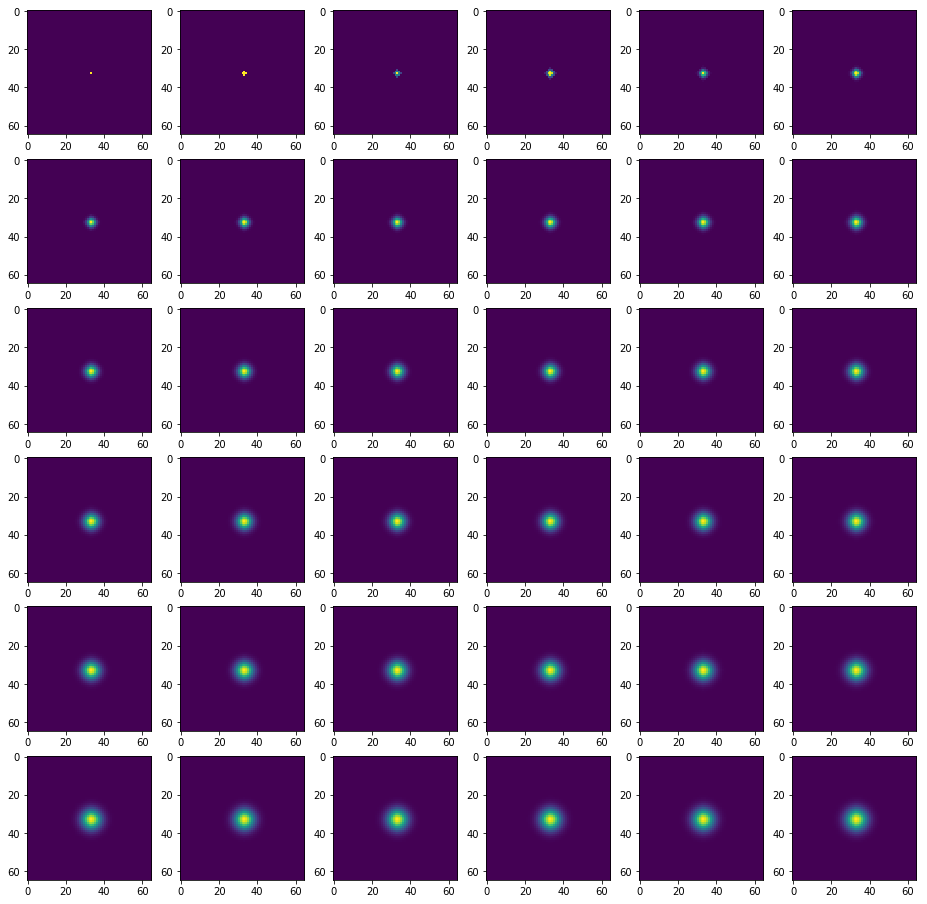

In [69]:
# test the code (only visual inspection)
k  = 65
nt = 36
dt = 0.2
hx = 1;
hy = 1;
rho0 = torch.zeros(k,k)
rho0[k//2+1,k//2+1] = 1
RHO = solveHeatEq(rho0,hx,hy,dt,nt)

# plot it
plt.figure(figsize = (16,16))
for i in range(36):
    Img  = RHO[:,:,i]
    plt.subplot(6,6,i+1)
    plt.imshow(Img)

# Using the heat equation to remove noise

While the heat equation has a physical interpretaion it can be used to romove noise from images.
Consider an image,$\rho$ which is a 2D array of possitive number. If the image is noisy then we can write that
$$ \rho = \rho_0 + \epsilon $$
where $\epsilon$ is the noise.

If we now run a heat equation starting from the initial condition as $\rho$ then the image is smoothed and the noise is removed.
We demonstrate it in the following code

torch.Size([367, 320]) torch.Size([367, 300])


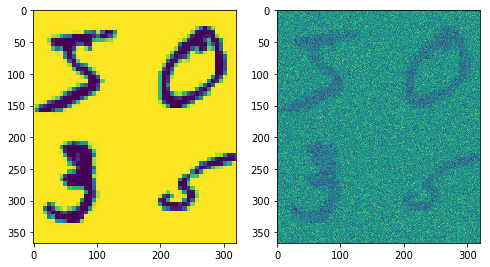

In [93]:
import PIL
from PIL import Image
# load the image
from matplotlib import image
# load image as pixel array
data = torch.tensor(image.imread('digits.jpg'))
data = data[:,:320,0]
# summarize shape of the pixel array
# display the array of pixels as an image
plt.figure(figsize = (8,16))
plt.subplot(1,2,1)
plt.imshow(data)

print(data.shape,noise.shape)
# Add noise
noise = 200*torch.randn(data.shape[0],data.shape[1])
dataN = data+noise
plt.subplot(1,2,2)
plt.imshow(dataN)



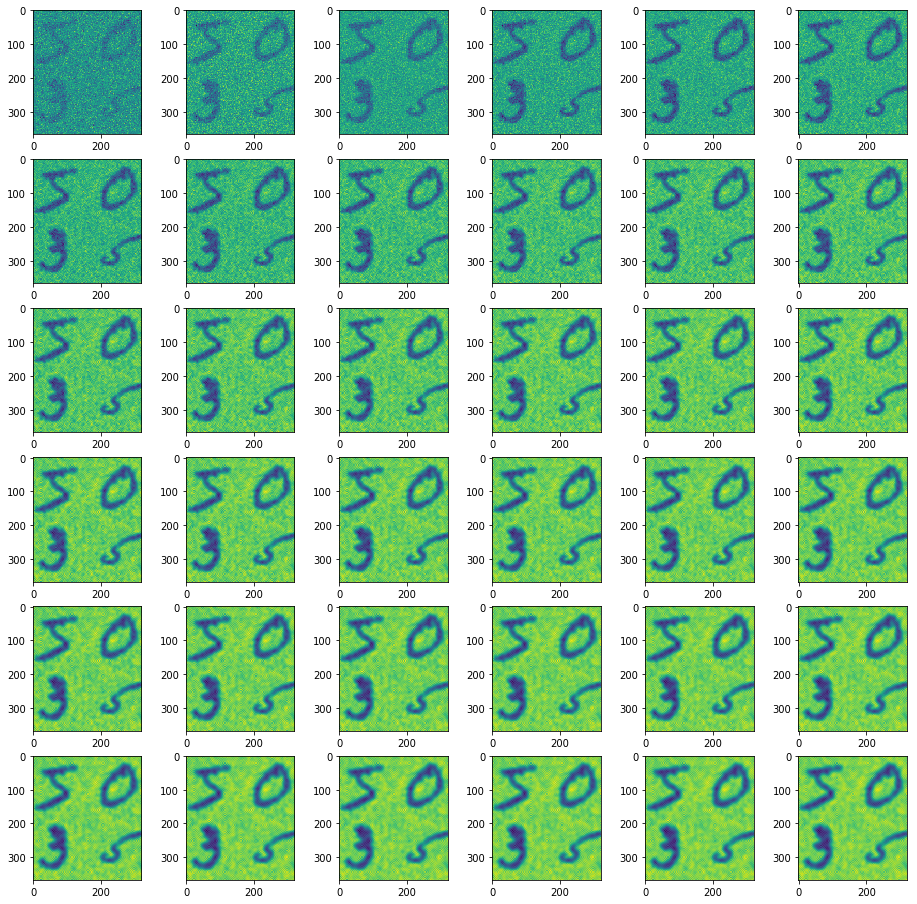

In [97]:
# Smooth the data and renove noise
nt = 36
hx = 1; h2 = 1; dt = 0.25
In = solveHeatEq(dataN,hx,hy,dt,nt)
# plot it
plt.figure(figsize = (16,16))
for i in range(36):
    Img  = In[:,:,i]
    plt.subplot(6,6,i+1)
    plt.imshow(Img)